In [1391]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [1429]:
df = pd.read_csv('./regression/train.csv')
# сразу заменим бесполезный Id на единичный вектор
df['Id'] = 1
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,0.0,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,1.0,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,1.0,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,1.0,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,1.0,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,1.0,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [1430]:
features = ['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
            'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
target = 'mean_exam_points'

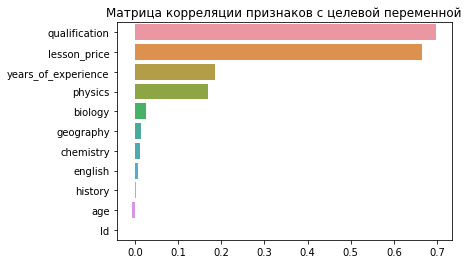

In [1486]:
corr_matrix = df[features + [target]].corr().iloc[:-1, -1].sort_values(ascending=False)
sns.barplot(x=corr_matrix.values, y=corr_matrix.index)
plt.title('Матрица корреляции признаков с целевой переменной')
plt.show()

На основании анализа признаков можно сделать вывод, что на целевую переменную большее влияние оказывают всего 4 признака 'qualification', 'lesson_price', 'years_of_experience', 'physics'.
Попробуем построить модель используя только эти признаки.

In [1496]:
key_features = ['Id','qualification', 'lesson_price', 'years_of_experience', 'physics']
X = df[key_features]
y = df[target]

In [1497]:
# функция для стандартизации входных данных
def standard_scale(x):
    mean =  x.mean()
    std = x.std()
    res = (x - mean) / std
    return res

In [1498]:
# стандартизируем признаки, которые имеют большую размерность, чтобы модель лучше обучилась
X_st = X.copy().astype(np.float64)
X_st['years_of_experience'] = standard_scale(X_st['years_of_experience'])
X_st['lesson_price'] = standard_scale(X_st['lesson_price'])
X_st['qualification'] = standard_scale(X_st['qualification'])

In [1499]:
X_st

,Id,qualification,lesson_price,years_of_experience,physics
0,1.0,-0.908157,-0.569847,-1.121084,1.0
1,1.0,1.616254,2.192654,1.135981,1.0
2,1.0,-0.908157,-0.950881,-1.121084,0.0
3,1.0,-0.908157,-0.569847,1.700247,0.0
4,1.0,-0.908157,-0.379330,-0.556818,0.0
...,...,...,...,...,...
9995,1.0,0.354049,0.001705,-1.121084,1.0
9996,1.0,0.354049,0.001705,-1.121084,0.0
9997,1.0,-0.908157,-0.855623,-0.556818,1.0
9998,1.0,-0.908157,-1.141399,0.571714,0.0


In [1500]:
X.shape, y.shape

((10000, 5), (10000,))

In [1501]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [1502]:
# функция для подсчета ошибки
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [1503]:
# расчет ошибки по r2 метрике
def r2err(y, y_pred):
    
    r2err = 1 - ((np.sum((y_pred - y) ** 2)) / (np.sum((y - np.mean(y)) ** 2 )))
                            
    return r2err
    

In [1504]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
   
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        #err = calc_mse(y, y_pred)
        err = r2err(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        W -= eta * (dQ + dReg)
        
        
        if i % (iterations / 100) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
            
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [1505]:
W = gradient_descent_reg_l2(X_st, y, iterations=4000, eta=1e-2, reg=1e-8)
W

Iter: 0, weights: Id                     1.063429
qualification         -2.068762
lesson_price           1.295751
years_of_experience    0.559316
physics                0.076422
dtype: float64, error -19.13682760758437
Iter: 40, weights: Id                     34.168391
qualification           2.872494
lesson_price            5.342376
years_of_experience     1.049324
physics                12.132721
dtype: float64, error -2.576613839451794
Iter: 80, weights: Id                     47.567202
qualification           4.290339
lesson_price            6.041689
years_of_experience     0.729055
physics                15.465844
dtype: float64, error -0.09527663579208023
Iter: 120, weights: Id                     53.267118
qualification           4.859224
lesson_price            6.023179
years_of_experience     0.461716
physics                15.626683
dtype: float64, error 0.3219656845897477
Iter: 160, weights: Id                     55.917061
qualification           5.186784
lesson_price     

Iter: 1480, weights: Id                     61.800351
qualification           6.702166
lesson_price            4.414589
years_of_experience     0.296294
physics                 5.151963
dtype: float64, error 0.5497851176681124
Iter: 1520, weights: Id                     61.804029
qualification           6.703625
lesson_price            4.413091
years_of_experience     0.296443
physics                 5.144099
dtype: float64, error 0.5497860473024994
Iter: 1560, weights: Id                     61.807167
qualification           6.704878
lesson_price            4.411805
years_of_experience     0.296571
physics                 5.137391
dtype: float64, error 0.5497867243641623
Iter: 1600, weights: Id                     61.809843
qualification           6.705955
lesson_price            4.410699
years_of_experience     0.296681
physics                 5.131668
dtype: float64, error 0.5497872174801738
Iter: 1640, weights: Id                     61.812127
qualification           6.706880
lesso

Iter: 2960, weights: Id                     61.825318
qualification           6.712460
lesson_price            4.404023
years_of_experience     0.297338
physics                 5.098581
dtype: float64, error 0.5497885395755785
Iter: 3000, weights: Id                     61.825328
qualification           6.712465
lesson_price            4.404018
years_of_experience     0.297339
physics                 5.098559
dtype: float64, error 0.5497885395831288
Iter: 3040, weights: Id                     61.825337
qualification           6.712469
lesson_price            4.404014
years_of_experience     0.297339
physics                 5.098540
dtype: float64, error 0.5497885395886322
Iter: 3080, weights: Id                     61.825344
qualification           6.712473
lesson_price            4.404010
years_of_experience     0.297339
physics                 5.098524
dtype: float64, error 0.5497885395926445
Iter: 3120, weights: Id                     61.825351
qualification           6.712476
lesso

Id                     61.825387
qualification           6.712494
lesson_price            4.403988
years_of_experience     0.297341
physics                 5.098433
dtype: float64

In [1450]:
# классический  GD запасной метод, использовался для тестов
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.zeros(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        #err = calc_mse(y, y_pred)
        err = r2err(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

#### Подготовка тестового датасета для предсказания оценки

In [1510]:
df_test = pd.read_csv('./regression/test.csv')
df_test['Id'] = 1
df_test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,1.0,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,0.0,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,1.0,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,1.0,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,1.0,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,1.0,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,1.0,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [1514]:
df_test['years_of_experience'] = standard_scale(df_test['years_of_experience'])
df_test['lesson_price'] = standard_scale(df_test['lesson_price'])
df_test['qualification'] = standard_scale(df_test['qualification'])

In [1515]:
X_df_test = df_test[key_features]
X_df_test

,Id,qualification,lesson_price,years_of_experience,physics
0,1,-0.894033,-1.234296,0.571977,0.0
1,1,0.366234,0.291657,0.571977,0.0
2,1,-0.894033,-0.280575,-0.549547,1.0
3,1,1.626501,2.294470,2.254262,1.0
4,1,1.626501,2.771331,1.132739,1.0
...,...,...,...,...,...
9995,1,-0.894033,-0.375947,-1.110308,0.0
9996,1,1.626501,0.959262,0.011215,0.0
9997,1,-0.894033,-1.138923,1.693500,0.0
9998,1,0.366234,0.100913,-1.110308,0.0


In [1517]:
pred_kaggle = np.dot(X_df_test, W)
pred_kaggle

array([50.55844196, 65.7382557 , 59.52357342, ..., 51.31193468,
       64.39800792, 72.43021632])

In [1518]:
df_pred = pd.read_csv('./regression/sample_submission.csv')
df_pred

,Id,mean_exam_points
0,10000,50.0
1,10001,50.0
2,10002,50.0
3,10003,50.0
4,10004,50.0
...,...,...
9995,19995,50.0
9996,19996,50.0
9997,19997,50.0
9998,19998,50.0


In [1519]:
df_pred[target] = pred_kaggle
df_pred

,Id,mean_exam_points
0,10000,50.558442
1,10001,65.738256
2,10002,59.523573
3,10003,88.616802
4,10004,90.383414
...,...,...
9995,19995,53.838385
9996,19996,76.971175
9997,19997,51.311935
9998,19998,64.398008


In [1520]:
df_pred.to_csv('./regression/to_kaggle.csv', index=False)